In [1]:
!pip install opencv-python-headless numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Murad\\AppData\\Roaming\\Python\\Python310\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [2]:
import cv2
import numpy as np

# Load the heatmap image
heatmap = cv2.imread('heatmap.png', cv2.IMREAD_GRAYSCALE)

# Apply edge detection (Canny)
edges = cv2.Canny(heatmap, 50, 150, apertureSize=3)


In [4]:
# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

# Draw the detected lines on the original heatmap
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(heatmap, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Save or display the result
cv2.imwrite('heatmap_with_lines.png', heatmap)


True

In [6]:
# slope, intercept , angle and length of the lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2-y1)/(x2-x1)
    intercept = y1 - slope*x1
    angle = np.arctan(slope)
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    print(f"Line: ({x1},{y1}) - ({x2},{y2}), slope: {slope}, intercept: {intercept}, angle: {angle}, length: {length}")


Line: (80,374) - (476,374), slope: 0.0, intercept: 374.0, angle: 0.0, length: 396.0
Line: (62,58) - (476,58), slope: 0.0, intercept: 58.0, angle: 0.0, length: 414.0
Line: (37,327) - (476,327), slope: 0.0, intercept: 327.0, angle: 0.0, length: 439.0
Line: (100,379) - (476,379), slope: 0.0, intercept: 379.0, angle: 0.0, length: 376.0
Line: (80,360) - (476,360), slope: 0.0, intercept: 360.0, angle: 0.0, length: 396.0
Line: (80,154) - (476,154), slope: 0.0, intercept: 154.0, angle: 0.0, length: 396.0
Line: (80,353) - (234,353), slope: 0.0, intercept: 353.0, angle: 0.0, length: 154.0
Line: (80,362) - (476,362), slope: 0.0, intercept: 362.0, angle: 0.0, length: 396.0
Line: (476,448) - (476,59), slope: -inf, intercept: inf, angle: -1.5707963267948966, length: 389.0
Line: (519,426) - (519,58), slope: -inf, intercept: inf, angle: -1.5707963267948966, length: 368.0
Line: (307,356) - (469,356), slope: 0.0, intercept: 356.0, angle: 0.0, length: 162.0
Line: (80,426) - (474,426), slope: 0.0, interce

C:\Users\Murad\AppData\Local\Temp\ipykernel_3676\2610763524.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (y2-y1)/(x2-x1)


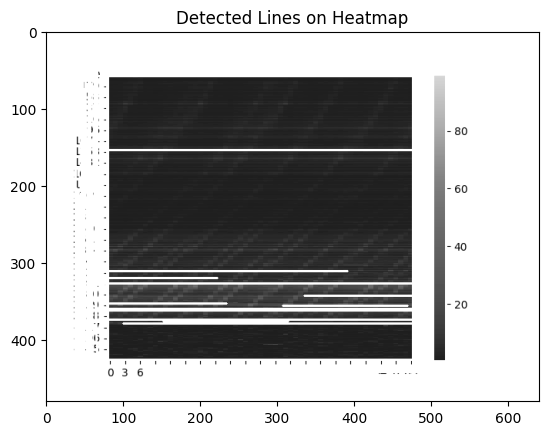

In [7]:
import matplotlib.pyplot as plt

# Display the result
plt.imshow(heatmap, cmap='gray')
plt.title('Detected Lines on Heatmap')
plt.show()